In [1]:
#class imbalance >> one class has higeher percentage
#upsampling, downsampling, smote

In [2]:
import numpy as np
import pandas as pd
np.random.seed(1) #for reproducibility

In [3]:
no_samples = 1000
class_0_ratio = 0.9
no_class_0 = int(no_samples * class_0_ratio)
no_class_1 = 100

In [4]:
class_0_ratio

0.9

In [5]:
no_class_0

900

In [6]:
no_class_1

100

In [8]:
len(np.random.normal(0, 1, no_class_0))

900

In [9]:
[0] * 10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [10]:
class_0 = {'feature1': np.random.normal(0, 1, no_class_0),
'feature2': np.random.normal(0, 1, no_class_0),
'target': [0]*no_class_0}

In [12]:
class_0 = pd.DataFrame(class_0)

In [13]:
class_0

,feature1,feature2,target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
895,-1.322762,-1.140488,0
896,0.540306,0.501016,0
897,-0.507257,0.225767,0
898,1.128379,-1.089087,0


In [15]:
class_1 = pd.DataFrame({'feature1': np.random.normal(3, 1, no_class_1),
'feature2': np.random.normal(3, 1, no_class_1),
'target': [1]*no_class_1})

In [16]:
class_1

,feature1,feature2,target
0,3.287434,3.298112,1
1,2.237815,2.867363,1
2,4.070726,0.748923,1
3,1.623348,5.893593,1
4,4.451720,5.742155,1
...,...,...,...
95,3.882598,2.874097,1
96,2.270035,2.039654,1
97,1.408784,2.156087,1
98,3.595189,3.628342,1


In [18]:
df = pd.concat([class_0, class_1]).reset_index(drop = True)

In [19]:
df

,feature1,feature2,target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
995,3.882598,2.874097,1
996,2.270035,2.039654,1
997,1.408784,2.156087,1
998,3.595189,3.628342,1


In [21]:
df.target.value_counts(normalize = True)

target
0    0.9
1    0.1
Name: proportion, dtype: float64

In [24]:
df_minority = df[df.target == 1]
df_majority = df[df.target == 0]

In [25]:
df_minority

,feature1,feature2,target
900,3.287434,3.298112,1
901,2.237815,2.867363,1
902,4.070726,0.748923,1
903,1.623348,5.893593,1
904,4.451720,5.742155,1
...,...,...,...
995,3.882598,2.874097,1
996,2.270035,2.039654,1
997,1.408784,2.156087,1
998,3.595189,3.628342,1


In [26]:
df_majority

,feature1,feature2,target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
895,-1.322762,-1.140488,0
896,0.540306,0.501016,0
897,-0.507257,0.225767,0
898,1.128379,-1.089087,0


In [27]:
#oversampling>>upsampling >>increasing the minority to majority no
from sklearn.utils import resample

In [28]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples = len(df_majority), random_state =1)

In [29]:
df_minority_upsampled

,feature1,feature2,target
937,2.670640,2.134272,1
912,2.415718,3.715354,1
972,1.145940,2.472038,1
909,3.423871,3.343292,1
975,5.347616,2.549717,1
...,...,...,...
936,2.711579,2.032502,1
998,3.595189,3.628342,1
901,2.237815,2.867363,1
932,3.187248,3.499442,1


In [30]:
df_minority_upsampled.shape

(900, 3)

In [36]:
df_minority_upsampled.duplicated().sum()

800

In [37]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [38]:
df_upsampled.shape

(1800, 3)

In [40]:
df_upsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [41]:
#downsmapling

In [42]:
df_minority

,feature1,feature2,target
900,3.287434,3.298112,1
901,2.237815,2.867363,1
902,4.070726,0.748923,1
903,1.623348,5.893593,1
904,4.451720,5.742155,1
...,...,...,...
995,3.882598,2.874097,1
996,2.270035,2.039654,1
997,1.408784,2.156087,1
998,3.595189,3.628342,1


In [43]:
df_majority

,feature1,feature2,target
0,-1.307971,-0.453503,0
1,1.472396,-0.820905,0
2,0.074876,0.940219,0
3,-1.786935,-1.411293,0
4,0.165211,0.884148,0
...,...,...,...
895,-1.322762,-1.140488,0
896,0.540306,0.501016,0
897,-0.507257,0.225767,0
898,1.128379,-1.089087,0


In [44]:
df_majority_downsampled = resample(df_majority, replace=False, n_samples = len(df_minority), random_state =1)

In [45]:
df_majority_downsampled

,feature1,feature2,target
860,-1.537535,0.122837,0
880,-0.838450,-1.586623,0
874,-0.771039,-1.448482,0
780,-2.018355,0.502019,0
525,-0.521316,0.452069,0
...,...,...,...
494,1.152007,0.781319,0
255,-0.241664,0.297858,0
672,-0.999110,-0.053589,0
481,-0.080607,-0.644226,0


In [46]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [47]:
df_downsampled

,feature1,feature2,target
900,3.287434,3.298112,1
901,2.237815,2.867363,1
902,4.070726,0.748923,1
903,1.623348,5.893593,1
904,4.451720,5.742155,1
...,...,...,...
494,1.152007,0.781319,0
255,-0.241664,0.297858,0
672,-0.999110,-0.053589,0
481,-0.080607,-0.644226,0


In [48]:
#SMOTE>> synthetic minority oversampling technique

In [49]:
from sklearn.datasets import make_classification

In [50]:
X, y = make_classification(n_samples = 1000, n_redundant = 0, n_features=2, n_clusters_per_class = 1, weights = [0.90], random_state = 1)

In [51]:
X

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [52]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [53]:
len(y[y==0])

894

In [54]:
len(y[y==1])

106

In [55]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
df_final = pd.concat([df1, df2], axis = 1)

In [56]:
df_final

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [57]:
df_final.target.value_counts()

target
0    894
1    106
Name: count, dtype: int64

In [58]:
df_final

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


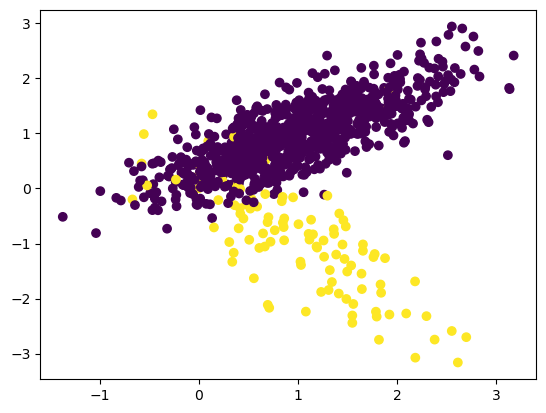

In [60]:
import matplotlib.pyplot as plt
plt.scatter(df_final['f1'], df_final['f2'], c = df_final['target'])

In [ ]:
# !pip install imblearn

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
oversample = SMOTE()

In [64]:
X, y = oversample.fit_resample(df_final[['f1', 'f2']], df_final['target'])

In [65]:
X

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
1783,0.941243,-0.159977
1784,1.932339,-2.850109
1785,0.282239,-0.932556
1786,2.623500,-2.643271


In [66]:
y

0       1
1       0
2       0
3       0
4       0
       ..
1783    1
1784    1
1785    1
1786    1
1787    1
Name: target, Length: 1788, dtype: int32

In [67]:
X.shape

(1788, 2)

In [68]:
y.shape

(1788,)

In [70]:
len(y[y==0])

894

In [71]:
len(y[y==1])

894

In [72]:
X

,f1,f2
0,1.536830,-1.398694
1,1.551108,1.810329
2,1.293619,1.010946
3,1.119889,1.632518
4,1.042356,1.121529
...,...,...
1783,0.941243,-0.159977
1784,1.932339,-2.850109
1785,0.282239,-0.932556
1786,2.623500,-2.643271


In [73]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
oversample = pd.concat([df1, df2], axis = 1)

In [74]:
oversample

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,0.941243,-0.159977,1
1784,1.932339,-2.850109,1
1785,0.282239,-0.932556,1
1786,2.623500,-2.643271,1


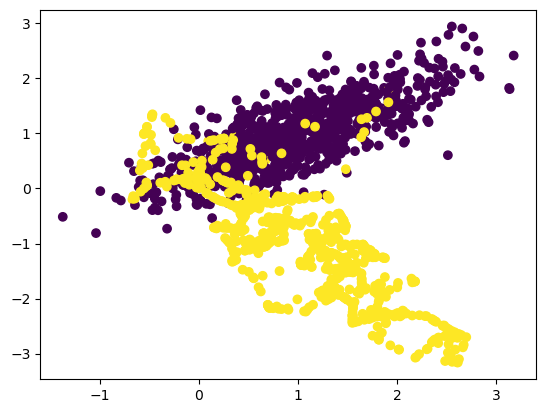

In [75]:
import matplotlib.pyplot as plt
plt.scatter(oversample['f1'], oversample['f2'], c = oversample['target'])